In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:

file = pd.read_excel("People_in_Need_2024.xlsx")
file

,Oblast Name,Raion Name,Raion Pcode,People in Need (Individuals),Severity of Needs,People Targeted (Individuals)
0,NaN,NaN,NaN,HE,HE,HE
1,adm1_en,adm2_en,adm2_pcode,overall_pin_he,overall_sev_he,overall_target_he
2,Vinnytska,Vinnytskyi,UA0502,93154.929427,2,-
3,Vinnytska,Haisynskyi,UA0504,25169.348329,2,-
4,Vinnytska,Zhmerynskyi,UA0506,17531.922877,2,-
...,...,...,...,...,...,...
125,Chernihivska,Nizhynskyi,UA7404,37050.861939,2,0
126,Chernihivska,Novhorod-Siverskyi,UA7406,23241.633746,4,19962.687
127,Chernihivska,Prylutskyi,UA7408,29126.622503,3,25017.635
128,Chernihivska,Chernihivskyi,UA7410,115865.237151,4,108516.101


In [4]:
# Змінення у таблиці значення "—" на значення NaN
file.replace("—", np.nan, inplace=True) 
file.head()

,Oblast Name,Raion Name,Raion Pcode,People in Need (Individuals),Severity of Needs,People Targeted (Individuals)
0,NaN,NaN,NaN,HE,HE,HE
1,adm1_en,adm2_en,adm2_pcode,overall_pin_he,overall_sev_he,overall_target_he
2,Vinnytska,Vinnytskyi,UA0502,93154.929427,2,-
3,Vinnytska,Haisynskyi,UA0504,25169.348329,2,-
4,Vinnytska,Zhmerynskyi,UA0506,17531.922877,2,-


In [5]:
# типи всіх стовпців за допомогою dataframe.dtypes
file.dtypes

Oblast Name                      object
Raion Name                       object
Raion Pcode                      object
People in Need (Individuals)     object
Severity of Needs                object
People Targeted (Individuals)    object
dtype: object

In [6]:
# Зміна типів нечислових колонок на числові

non_numeric_columns = file.columns.difference(['Oblast Name', 'Raion Name', 'Raion Pcode'])  
file[non_numeric_columns] = file[non_numeric_columns].apply(pd.to_numeric, errors='coerce')
file.dtypes

Oblast Name                       object
Raion Name                        object
Raion Pcode                       object
People in Need (Individuals)     float64
Severity of Needs                float64
People Targeted (Individuals)    float64
dtype: object

In [7]:
# Частка пропусків, що міститься в кожній колонці (методи isnull та sum)
missing = (file.isnull().sum() / len(file)) * 100
print(missing)

Oblast Name                       0.769231
Raion Name                        0.769231
Raion Pcode                       0.769231
People in Need (Individuals)     19.230769
Severity of Needs                 2.307692
People Targeted (Individuals)    52.307692
dtype: float64


In [8]:
# Зміна відсутніх даних у стовпцях на середні значення

file.fillna(file['People in Need (Individuals)'].mean(), inplace=True)
file.fillna(file['Severity of Needs'].mean(), inplace=True)
file.fillna(file['People Targeted (Individuals)'].mean(), inplace=True)

file

,Oblast Name,Raion Name,Raion Pcode,People in Need (Individuals),Severity of Needs,People Targeted (Individuals)
0,74076.753283,74076.753283,74076.753283,7.407675e+04,74076.753283,74076.753283
1,adm1_en,adm2_en,adm2_pcode,7.407675e+04,74076.753283,74076.753283
2,Vinnytska,Vinnytskyi,UA0502,9.315493e+04,2.000000,74076.753283
3,Vinnytska,Haisynskyi,UA0504,2.516935e+04,2.000000,74076.753283
4,Vinnytska,Zhmerynskyi,UA0506,1.753192e+04,2.000000,74076.753283
...,...,...,...,...,...,...
125,Chernihivska,Nizhynskyi,UA7404,3.705086e+04,2.000000,0.000000
126,Chernihivska,Novhorod-Siverskyi,UA7406,2.324163e+04,4.000000,19962.687000
127,Chernihivska,Prylutskyi,UA7408,2.912662e+04,3.000000,25017.635000
128,Chernihivska,Chernihivskyi,UA7410,1.158652e+05,4.000000,108516.101000


In [9]:
# Частка пропусків, що міститься в кожній колонці (методи isnull та sum)
missing = (file.isnull().sum() / len(file)) * 100
print(missing)

Oblast Name                      0.0
Raion Name                       0.0
Raion Pcode                      0.0
People in Need (Individuals)     0.0
Severity of Needs                0.0
People Targeted (Individuals)    0.0
dtype: float64


In [10]:
file = file.drop(index=[0,1])
file

,Oblast Name,Raion Name,Raion Pcode,People in Need (Individuals),Severity of Needs,People Targeted (Individuals)
2,Vinnytska,Vinnytskyi,UA0502,9.315493e+04,2.0,74076.753283
3,Vinnytska,Haisynskyi,UA0504,2.516935e+04,2.0,74076.753283
4,Vinnytska,Zhmerynskyi,UA0506,1.753192e+04,2.0,74076.753283
5,Vinnytska,Mohyliv-Podilskyi,UA0508,1.236959e+04,2.0,74076.753283
6,Vinnytska,Tulchynskyi,UA0510,1.457456e+04,2.0,1557.850000
...,...,...,...,...,...,...
125,Chernihivska,Nizhynskyi,UA7404,3.705086e+04,2.0,0.000000
126,Chernihivska,Novhorod-Siverskyi,UA7406,2.324163e+04,4.0,19962.687000
127,Chernihivska,Prylutskyi,UA7408,2.912662e+04,3.0,25017.635000
128,Chernihivska,Chernihivskyi,UA7410,1.158652e+05,4.0,108516.101000


In [137]:
# # Створення нової таблиці data, в якій будуть тільки рядки зі певними областями, Dnipropetrovska, Donetska, Zaporizka, Mykolaivska, Odeska, Kharkivska, Khersonska
# oblasts = [
#     'Dnipropetrovska', 'Donetska', 'Zaporizka', 
#     'Mykolaivska', 'Odeska', 'Kharkivska', 'Khersonska'
# ]

# data = file[file['Oblast Name'].isin(oblasts)]
# data.head()

,Oblast Name,Raion Name,Raion Pcode,People in Need (Individuals),Severity of Needs,People Targeted (Individuals)
12,Dnipropetrovska,Dniprovskyi,UA1202,329921.370000,2.0,329920.825000
13,Dnipropetrovska,Kamianskyi,UA1204,74076.753283,2.0,74076.753283
14,Dnipropetrovska,Kryvorizkyi,UA1206,74076.753283,3.0,74076.753283
15,Dnipropetrovska,Nikopolskyi,UA1208,74076.753283,4.0,74076.753283
16,Dnipropetrovska,Novomoskovskyi,UA1210,74076.753283,3.0,74076.753283


In [138]:
# data.shape

(43, 6)

In [19]:
file = file.drop(index=[48])
file

,Oblast Name,Raion Name,Raion Pcode,People in Need (Individuals),Severity of Needs,People Targeted (Individuals)
2,Vinnytska,Vinnytskyi,UA0502,9.315493e+04,2.0,74076.753283
3,Vinnytska,Haisynskyi,UA0504,2.516935e+04,2.0,74076.753283
4,Vinnytska,Zhmerynskyi,UA0506,1.753192e+04,2.0,74076.753283
5,Vinnytska,Mohyliv-Podilskyi,UA0508,1.236959e+04,2.0,74076.753283
6,Vinnytska,Tulchynskyi,UA0510,1.457456e+04,2.0,1557.850000
...,...,...,...,...,...,...
125,Chernihivska,Nizhynskyi,UA7404,3.705086e+04,2.0,0.000000
126,Chernihivska,Novhorod-Siverskyi,UA7406,2.324163e+04,4.0,19962.687000
127,Chernihivska,Prylutskyi,UA7408,2.912662e+04,3.0,25017.635000
128,Chernihivska,Chernihivskyi,UA7410,1.158652e+05,4.0,108516.101000


In [12]:
# Описова статистика за допомогою методу describe 
stats = file['Severity of Needs'].describe()
stats

count      128.000000
mean       581.334010
std       6547.289431
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max      74076.753283
Name: Severity of Needs, dtype: float64

In [13]:
stats = file['People in Need (Individuals)'].describe()
stats

count    1.280000e+02
mean     7.407675e+04
std      1.541651e+05
min      1.919727e+03
25%      1.802286e+04
50%      3.746916e+04
75%      7.407675e+04
max      1.284640e+06
Name: People in Need (Individuals), dtype: float64

In [154]:
# #  описова статистику за допомогою методу describe 
# stats = data['People in Need (Individuals)'].describe()
# stats

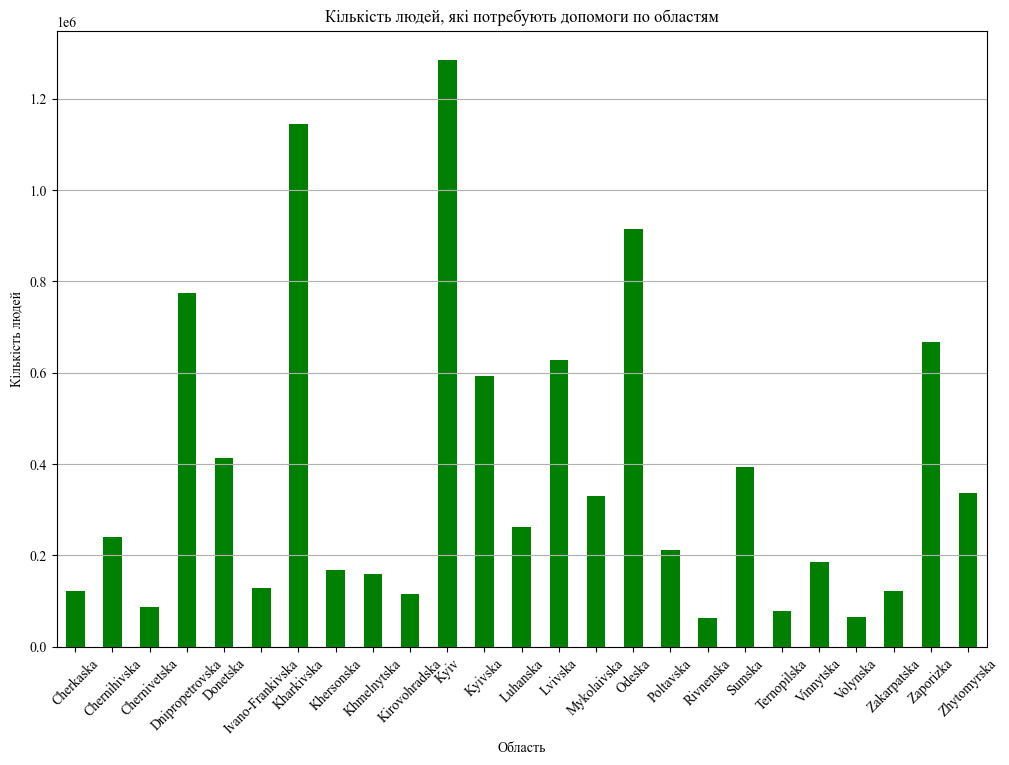

In [14]:
# Візуалізація
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(12, 8))
file.groupby('Oblast Name')['People in Need (Individuals)'].sum().plot(kind='bar', color='green')
plt.title('Кількість людей, які потребують допомоги по областям')
plt.xlabel('Область')
plt.ylabel('Кількість людей')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [153]:
# # Налаштування шрифту
# plt.rcParams["font.family"] = "Times New Roman"
# plt.figure(figsize=(12, 8))
# data.groupby('Oblast Name')['People in Need (Individuals)'].sum().plot(kind='bar', color='green')
# plt.title('Кількість людей, які потребують допомоги по областям')
# plt.xlabel('Область')
# plt.ylabel('Кількість людей')
# plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.show()


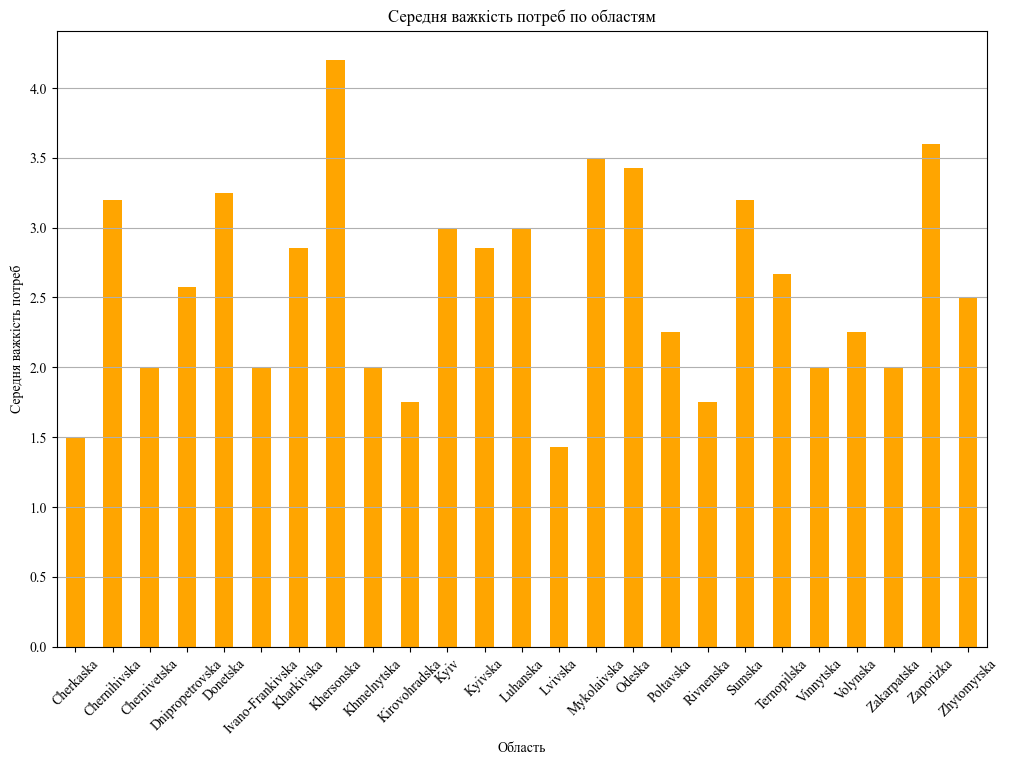

In [20]:
# Візуалізація
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(12, 8))
file.groupby('Oblast Name')['Severity of Needs'].mean().plot(kind='bar', color='orange')
plt.title('Середня важкість потреб по областям')
plt.xlabel('Область')
plt.ylabel('Середня важкість потреб')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [17]:
# # Налаштування шрифту
# plt.rcParams["font.family"] = "Times New Roman"
# plt.figure(figsize=(12, 8))
# data.groupby('Oblast Name')['Severity of Needs'].mean().plot(kind='bar', color='orange')
# plt.title('Середня важкість потреб по областям')
# plt.xlabel('Область')
# plt.ylabel('Середня важкість потреб')
# plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.show()


In [156]:
# # Налаштування шрифту
# plt.rcParams["font.family"] = "Times New Roman"
# plt.figure(figsize=(20, 8))
# data.groupby('Raion Name')['People in Need (Individuals)'].sum().plot(kind='bar', color='green')
# plt.title('Кількість людей, які потребують допомоги по районам')
# plt.xlabel('Район')
# plt.ylabel('Кількість людей')
# plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.show()

In [157]:
# # Групування даних по районам
# raion_data = data.groupby('Raion Name')['People in Need (Individuals)'].sum()

# # Сортування даних та вибір топ-районів
# top_raions = raion_data.sort_values(ascending=False).head(10)
# other_raions = raion_data.sort_values(ascending=False).iloc[10:]

# # Додавання категорії "Інші"
# top_raions['Інші'] = other_raions.sum()
# # Налаштування шрифту
# plt.rcParams["font.family"] = "Times New Roman"

# # Побудова кругової діаграми
# colors = plt.cm.viridis(np.linspace(0, 1, len(top_raions)))
# plt.figure(figsize=(10, 8))
# patches, texts, autotexts = plt.pie(top_raions, labels=top_raions.index, autopct='%1.1f%%', startangle=140, colors=colors)
# plt.title('Кількість людей, які потребують допомоги по районам', fontsize=14)
# plt.axis('equal')

# # Додавання легенди для категорії "Інші"
# legend_labels = [f"{raion}: {count}" for raion, count in other_raions.items()]
# plt.legend(patches, top_raions.index, title="Райони", bbox_to_anchor=(1.05, 1), loc='lower left')

# # Виведення категорії "Інші" з переліком районів
# plt.gcf().text(1.1, 0.5, "'Інші' включають:\n" + "\n".join(legend_labels), fontsize=10)

# plt.show()

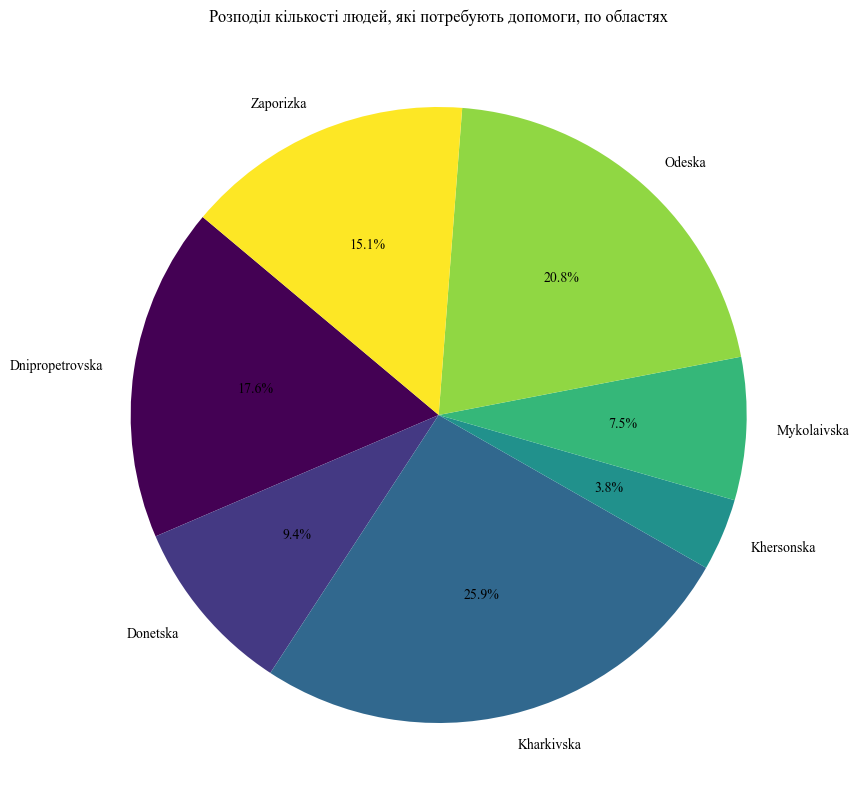

In [149]:

# # Створення кругової діаграми по областях
# oblast_data = data.groupby('Oblast Name')['People in Need (Individuals)'].sum()
# # Налаштування шрифту
# plt.rcParams["font.family"] = "Times New Roman"

# plt.figure(figsize=(10, 10))
# oblast_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
# plt.title('Розподіл кількості людей, які потребують допомоги, по областях')
# plt.ylabel('')
# plt.show()

In [159]:
# # Групування даних по ступеню важкості потреб
# severity_stats = data.groupby('Severity of Needs')['People in Need (Individuals)'].sum()

# # Побудова стовпчастої діаграми
# plt.figure(figsize=(8, 6))
# severity_stats.plot(kind='bar', color='lightgreen', edgecolor='black')
# plt.title('Кількість людей, які потребують допомоги за ступенем важкості потреб')
# plt.xlabel('Ступінь важкості потреб')
# plt.ylabel('Кількість людей')
# plt.xticks(rotation=0)
# plt.grid(axis='y')
# plt.show()
